In [140]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Simulation import buffer_simulation, save_obj, load_obj
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.ticker as ticker
from pylab import *
from IPython.display import display,HTML
import cufflinks as cf
import plotly.offline as py
from pandas import ExcelWriter
from openpyxl import Workbook

In [142]:
datos  = pd.read_excel('MoRS\Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Grafics_correccion_VBW.xlsx',sheet_name='graficar _fig_1_52')
tabla= datos.set_index("Voltajes")
tabla
df_tabla = pd.DataFrame(tabla)
df_tabla

,E,FlipPatch,% Fallos,Unnamed: 4,Unnamed: 5,Fallos,Unnamed: 7
Voltajes,,,,,,,
0.52,0.158617,0.189971,23.790000,NaN,NaN,265238,249456.2304
0.53,0.237615,0.511110,6.700000,NaN,1048576.0,72408,70254.5920
0.54,0.473274,0.988610,1.110000,NaN,NaN,11817,11639.1936
0.55,0.721056,1.000000,0.304317,NaN,NaN,3191,NaN
0.56,0.910538,1.000000,0.107384,NaN,NaN,1126,NaN
0.57,0.995641,1.000000,0.032139,NaN,NaN,337,NaN
0.58,0.995701,1.000000,0.005341,NaN,NaN,56,NaN
0.59,1.000978,1.000000,0.000572,NaN,NaN,6,NaN
0.60,1.000978,1.000000,0.000191,NaN,NaN,2,NaN


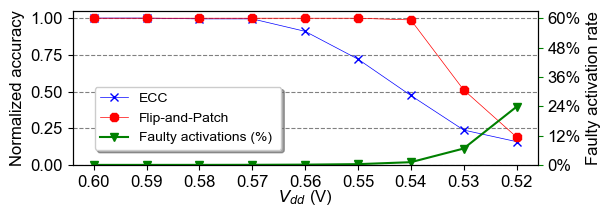

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [143]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib.patches import Rectangle

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

#from datetime import datetime
import time




l='0.5'
marksize=6

x=datos["Voltajes"]
y1 = 0.05 * x**2
y2 = 1 *y1


#plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots(figsize=(6,2))
#x_rect = 0.5
#y_rect = 0.5
#width_rect =0.5
#height_rect = 0.1
#
## Crear el cuadro transparente en el primer eje
#rect = plt.Rectangle((x_rect, y_rect), width_rect, height_rect, linewidth=1, edgecolor='g', facecolor='none', alpha=0.5)
#
## Agregar el cuadro al primer eje
#ax1.add_patch(rect)

ax2 = ax1.twinx()





#ax1= fig.add_subplot(1,3,1)
x_values = range(len(x))


#plt.ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")

#ax1.yaxis.set_label_position("left")
#ax1.yaxis.tick_left()
#ax2.yaxis.set_label_position("right")
ax1.set_ylabel('Normalized accuracy')
ax2.set_ylabel('Faulty activation rate')
ax1.set_xlabel("$V_{dd}$ (V)")
ax1.xaxis.set_label_coords(0.5, -0.15)
#ax2.yaxis.tick_right()


ax1.set_xticks([0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60]) 
#ax1.set_xticks([0.51,0.53,0.55,0.57,0.59]) 
#ax2.set_yticks(labelsize=12,fontfamily="serif") 

#ax1.tick_params(axis="x",labelsize=12,fontfamily="serif") 
#plt.xticks(x, tabla.index, fontsize= 12, fontfamily="serif" )

#ax2.set_ylim(0,  8.1)
ax1.set_ylim(0,1.05)



#ax1.set_title(" ECC vs Baseline SqueezeNet")
ax1.invert_xaxis()

#mport matplotlib.pyplot as plt
import matplotlib.patches as patches

#fig, ax = plt.subplots()

#ax1.plot([1, 4], [1, 4])



ax1.plot(tabla["E"], label='ECC', color='b', ls='-', lw=l, marker='x', markersize=marksize)
ax1.plot(tabla["FlipPatch"], label='Flip-and-Patch', color='r', ls='-', lw=l, marker='8', markersize=marksize)
Extra=ax2.plot(tabla["% Fallos"] ,label='Faulty activations (%) ', color='g', ls='-',marker='v', markersize=marksize )
#ax1.plot(tabla["FlipPatch_0.53"], label='FlipPatch 0.53 V', color="b", ls='-', lw=l, marker='x', markersize=marksize)
#ax1.plot(tabla["FlipPatch_0.54"], label='FlipPatch 0.54 V', color="r", ls='-', lw=l, marker='8', markersize=marksize)
#ax1.grid(axis='y', color = 'gray', linestyle = 'dashed')
#ax1.grid(axis='x', color = 'gray', linestyle = 'dashed')
# Definir las coordenadas del cuadro y su tamaño



ax1.yaxis.grid(color='gray', linestyle='dashed')
#ax2.yaxis.grid(color='g', linestyle='dashed')



def porcentaje_formatter(x, pos):
    return f'{x:.0f}%'

# Aplicar la función de formateo al eje y
formatter = FuncFormatter(porcentaje_formatter)
ax2.yaxis.set_major_formatter(formatter)
#line1.set_marker(None)
ax2.tick_params(axis='y', color='g')
#legend1= ax2.legend(handles=[Extra],loc='lower right',labels=[],handlelength=0, handleheight=25.5,facecolor='lightsteelblue')
custom_legend = [Line2D([], [])]
#legend1= ax2.legend(custom_legend, [''],handles=[Extra],loc='lower right',labels=[],handlelength=0,
#                    handleheight=24,fancybox=True, framealpha=0.2,frameon=True,borderpad=1.8,bbox_to_anchor=(0.99,-0.01))

#    
fig1.legend(fontsize=10,bbox_to_anchor=(0.15,0.15),loc ="lower left", shadow = True)
#
#for legend_handle in legend1.legendHandles:
    #legend_handle.set_alpha(0.0)  
ax2.set_ylim(0,63)
#ax2.xticks(np.arange(0, 60, 12))
ax2.set_yticks(np.arange(0, 63, 12))
ax1.set_yticks(np.arange(0, 1.05, 0.25))





plt.savefig('Acc_by_fault_rate_short_paper_0_52.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#
plt.tight_layout()





plt.show

In [147]:
datos_53  = pd.read_excel('MoRS\Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Grafics_correccion_VBW.xlsx',sheet_name='graficar_fig1_53')
tabla_53= datos_53.set_index("Voltajes")
tabla_53
df_tabla_53 = pd.DataFrame(tabla_53)
df_tabla_53

,E,FlipPatch,% Fallos,Unnamed: 4,Unnamed: 5,Fallos,Unnamed: 7
Voltajes,,,,,,,
0.53,0.237615,0.51111,6.700000,NaN,1048576.0,72408,70254.5920
0.54,0.473274,0.98861,1.110000,NaN,NaN,11817,11639.1936
0.55,0.721056,1.00000,0.304317,NaN,NaN,3191,NaN
0.56,0.910538,1.00000,0.107384,NaN,NaN,1126,NaN
0.57,0.995641,1.00000,0.032139,NaN,NaN,337,NaN
0.58,0.995701,1.00000,0.005341,NaN,NaN,56,NaN
0.59,1.000978,1.00000,0.000572,NaN,NaN,6,NaN
0.60,1.000978,1.00000,0.000191,NaN,NaN,2,NaN


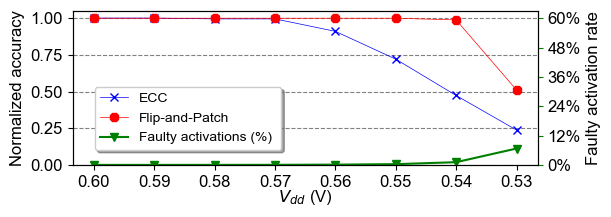

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [148]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib.patches import Rectangle

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

#from datetime import datetime
import time




l='0.5'
marksize=6

x=datos["Voltajes"]
y1 = 0.05 * x**2
y2 = 1 *y1


#plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots(figsize=(6,2))
#x_rect = 0.5
#y_rect = 0.5
#width_rect =0.5
#height_rect = 0.1
#
## Crear el cuadro transparente en el primer eje
#rect = plt.Rectangle((x_rect, y_rect), width_rect, height_rect, linewidth=1, edgecolor='g', facecolor='none', alpha=0.5)
#
## Agregar el cuadro al primer eje
#ax1.add_patch(rect)

ax2 = ax1.twinx()





#ax1= fig.add_subplot(1,3,1)
x_values = range(len(x))


#plt.ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")

#ax1.yaxis.set_label_position("left")
#ax1.yaxis.tick_left()
#ax2.yaxis.set_label_position("right")
ax1.set_ylabel('Normalized accuracy')
ax2.set_ylabel('Faulty activation rate')
ax1.set_xlabel("$V_{dd}$ (V)")
ax1.xaxis.set_label_coords(0.5, -0.15)
#ax2.yaxis.tick_right()


ax1.set_xticks([0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60]) 
#ax1.set_xticks([0.51,0.53,0.55,0.57,0.59]) 
#ax2.set_yticks(labelsize=12,fontfamily="serif") 

#ax1.tick_params(axis="x",labelsize=12,fontfamily="serif") 
#plt.xticks(x, tabla.index, fontsize= 12, fontfamily="serif" )

#ax2.set_ylim(0,  8.1)
ax1.set_ylim(0,1.05)



#ax1.set_title(" ECC vs Baseline SqueezeNet")
ax1.invert_xaxis()

#mport matplotlib.pyplot as plt
import matplotlib.patches as patches

#fig, ax = plt.subplots()

#ax1.plot([1, 4], [1, 4])



ax1.plot(df_tabla_53["E"], label='ECC', color='b', ls='-', lw=l, marker='x', markersize=marksize)
ax1.plot(df_tabla_53["FlipPatch"], label='Flip-and-Patch', color='r', ls='-', lw=l, marker='8', markersize=marksize)
Extra=ax2.plot(df_tabla_53["% Fallos"] ,label='Faulty activations (%) ', color='g', ls='-',marker='v', markersize=marksize )
#ax1.plot(tabla["FlipPatch_0.53"], label='FlipPatch 0.53 V', color="b", ls='-', lw=l, marker='x', markersize=marksize)
#ax1.plot(tabla["FlipPatch_0.54"], label='FlipPatch 0.54 V', color="r", ls='-', lw=l, marker='8', markersize=marksize)
#ax1.grid(axis='y', color = 'gray', linestyle = 'dashed')
#ax1.grid(axis='x', color = 'gray', linestyle = 'dashed')
# Definir las coordenadas del cuadro y su tamaño



ax1.yaxis.grid(color='gray', linestyle='dashed')
#ax2.yaxis.grid(color='g', linestyle='dashed')



def porcentaje_formatter(x, pos):
    return f'{x:.0f}%'

# Aplicar la función de formateo al eje y
formatter = FuncFormatter(porcentaje_formatter)
ax2.yaxis.set_major_formatter(formatter)
#line1.set_marker(None)
ax2.tick_params(axis='y', color='g')
#legend1= ax2.legend(handles=[Extra],loc='lower right',labels=[],handlelength=0, handleheight=25.5,facecolor='lightsteelblue')
custom_legend = [Line2D([], [])]
#legend1= ax2.legend(custom_legend, [''],handles=[Extra],loc='lower right',labels=[],handlelength=0,
#                    handleheight=24,fancybox=True, framealpha=0.2,frameon=True,borderpad=1.8,bbox_to_anchor=(0.99,-0.01))
#
#
##borderpad=1.3
#
#
#
#
## Agregar texto personalizado a la leyenda
#
#texto_personalizado = "Ultra-low\n    $V_{dd}$ "
#texto_obj = legend1.texts[0]
#texto_obj.set_text(texto_personalizado)
#texto_obj.set_position((-3, 75))
#texto_obj.set_fontsize(12)
##texto_obj.set_color('cyan')
#
## Añadir contorno a la leyenda
#legend1.get_frame().set_edgecolor('black')  # Color del contorno
#legend1.get_frame().set_linewidth(1.5)  # Grosor del contorno
#
#
#
#
#    
fig1.legend(fontsize=10,bbox_to_anchor=(0.15,0.15),loc ="lower left", shadow = True)
#
#for legend_handle in legend1.legendHandles:
    #legend_handle.set_alpha(0.0)  
ax2.set_ylim(0,63)
#ax2.xticks(np.arange(0, 60, 12))
ax2.set_yticks(np.arange(0, 63, 12))
ax1.set_yticks(np.arange(0, 1.05, 0.25))





plt.savefig('Acc_by_fault_rate_short_paper_0_53.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#
plt.tight_layout()





plt.show

In [159]:
import pandas as pd
acc_by_tech=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols_correccion_VBW.xlsx',sheet_name='Hoja1 (2)', usecols=["Redes","Tecnic" ,"0.52 V"])
acc_by_tech= acc_by_tech.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
#acc_by_tech
#df = pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja2')
df = pd.DataFrame(acc_by_tech)
# Extraer los datos de la columna 'Columna1'
#Tecnic = df['Tecnic']
#Redes  = df['Redes']
#columnas_seleccionadas = df.iloc[ [2, 3, 4]]  
#ACC=df["0.53 V","0.52 V","0.51 V"]
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])
acc_by_tech

,Redes,0.52 V
Tecnic,,
Base,Alex,0.136527
F+P,NaN,0.707186
SP+S,NaN,0.996407
Base,Squeeze,0.136390
F+P,NaN,0.131805
SP+S,NaN,0.995702
Base,VGG16,0.145695
F+P,NaN,0.145695
SP+S,NaN,0.998013


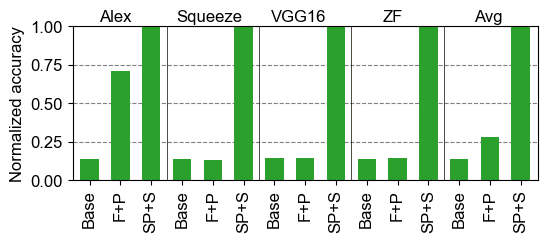

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['axes.titlesize'] = 12  # Tamaño del título de los ejes
plt.rcParams['axes.labelsize'] = 12 # Tamaño de las etiquetas de los ejes
plt.rcParams['legend.fontsize'] = 12  # Tamaño de la fuente de las leyendas
plt.rcParams['xtick.labelsize'] = 12  # Tamaño de las etiquetas del eje x
plt.rcParams['ytick.labelsize'] = 12  # Tamaño de las etiquetas del eje y




n = len(acc_by_tech.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
#coloresRedes = ['#ff7f0e', 'green','dodgerblue']
#coloresRedes = ['#ffbb78', '#1f77b4','#7f7f7f']
coloresRedes = [ '#2ca02c' ]
#coloresRedes = ['#d62728', '#2ca02c', '#9467bd']



bars=acc_by_tech.plot(kind ='bar' ,stacked = False,width = 0.60, color = coloresRedes, figsize=(6.0,2.0), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized accuracy')
plt.xticks(x, acc_by_tech.index )
plt.legend([]).remove()
plt.ylim(0,1)
#bars.set_ylim(bottom=0, top=3)

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])



plt.axvline(x=2.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=5.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=8.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=11.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=14.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=17.5, ymax= 1, color="black", linewidth=0.5)


plt.text(0.32, 1.03, 'Alex')
plt.text(2.8, 1.03, 'Squeeze')
plt.text(5.9, 1.03, 'VGG16' )
plt.text(9.5,1.03, 'ZF')
plt.text(12.5, 1.03, 'Avg')
#plt.text(15.4, 1.03, 'ZF')
#plt.text(18.1, 1.03, 'Avg')


plt.savefig('Mors_acc_by_tech_modif_shortpaper_0_52.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

In [164]:
import pandas as pd
acc_by_tech_53=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols_correccion_VBW.xlsx',sheet_name='Hoja1 (2)', usecols=["Redes","Tecnic" ,"0.53 V"])
acc_by_tech_53= acc_by_tech_53.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
#acc_by_tech
#df = pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja2')
df = pd.DataFrame(acc_by_tech_53)

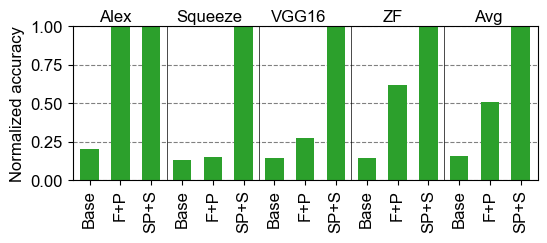

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['axes.titlesize'] = 12  # Tamaño del título de los ejes
plt.rcParams['axes.labelsize'] = 12 # Tamaño de las etiquetas de los ejes
plt.rcParams['legend.fontsize'] = 12  # Tamaño de la fuente de las leyendas
plt.rcParams['xtick.labelsize'] = 12  # Tamaño de las etiquetas del eje x
plt.rcParams['ytick.labelsize'] = 12  # Tamaño de las etiquetas del eje y




n = len(acc_by_tech.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
#coloresRedes = ['#ff7f0e', 'green','dodgerblue']
#coloresRedes = ['#ffbb78', '#1f77b4','#7f7f7f']
coloresRedes = [ '#2ca02c' ]
#coloresRedes = ['#d62728', '#2ca02c', '#9467bd']

#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=acc_by_tech_53.plot(kind ='bar' ,stacked = False,width = 0.60, color = coloresRedes, figsize=(6.0,2.0), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized accuracy')
plt.xticks(x, acc_by_tech_53.index )
plt.legend([]).remove()
plt.ylim(0,1)
#bars.set_ylim(bottom=0, top=3)

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])



plt.axvline(x=2.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=5.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=8.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=11.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=14.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=17.5, ymax= 1, color="black", linewidth=0.5)


plt.text(0.32, 1.03, 'Alex')
plt.text(2.8, 1.03, 'Squeeze')
plt.text(5.9, 1.03, 'VGG16' )
plt.text(9.5,1.03, 'ZF')
plt.text(12.5, 1.03, 'Avg')
#plt.text(15.4, 1.03, 'ZF')
#plt.text(18.1, 1.03, 'Avg')




plt.savefig('Mors_acc_by_tech_modif_shortpaper_0_53.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

## Energy

In [187]:
import pandas as pd
Energia_Mors=pd.read_excel('MoRS/Analisis_Resultados/Energía_VBW/final_prestaciones_energia_SaS.xlsx',sheet_name='energy_iccd_short',
                           usecols=["Redes","FaP" ,"SaS_52"])
Energia_Mors= Energia_Mors.set_index("Redes")

Energia_Mors_0_53=pd.read_excel('MoRS/Analisis_Resultados/Energía_VBW/final_prestaciones_energia_SaS.xlsx',sheet_name='energy_iccd_short',
                           usecols=["Redes","FaP" ,"SaS_53"])
Energia_Mors_0_53= Energia_Mors_0_53.set_index("Redes")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
#acc_by_tech
#df = pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja2')
df = pd.DataFrame(Energia_Mors)
# Extraer los datos de la columna 'Columna1'
#Tecnic = df['Tecnic']
#Redes  = df['Redes']
#columnas_seleccionadas = df.iloc[ [2, 3, 4]]  
#ACC=df["0.53 V","0.52 V","0.51 V"]
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])
#Energia_Mors
Energia_Mors_0_53

,FaP,SaS_53
Redes,,
Alex,0.939779,0.917858
Squeeze,0.935377,0.918434
VGG16,0.940426,0.917565
ZF,0.940103,0.917820
Avg,0.938921,0.917919


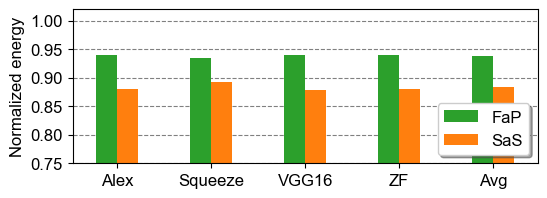

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile


plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['axes.titlesize'] = 12  # Tamaño del título de los ejes
plt.rcParams['axes.labelsize'] = 12 # Tamaño de las etiquetas de los ejes
plt.rcParams['legend.fontsize'] = 12  # Tamaño de la fuente de las leyendas
plt.rcParams['xtick.labelsize'] = 12  # Tamaño de las etiquetas del eje x
plt.rcParams['ytick.labelsize'] = 12  # Tamaño de las etiquetas del eje y

n = len(Energia_Mors.index)
x = np.arange(n)
coloresRedes = ['#2CA02C', '#FF7F0E' ]
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(15,5), dpi=100)

bars=Energia_Mors.plot(kind ='bar' ,stacked = False,width = 0.45, color = coloresRedes,figsize=(6,2.0), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized energy')
plt.xticks(x, Energia_Mors.index )

#lg = plt.legend(  loc ="center", bbox_to_anchor=(0.5,1.1),shadow = True)
lg.draw_frame(False)
plt.legend((['FaP','SaS']),  loc ="lower right", shadow = True)
plt.ylim(0.75,1.02)
#bars.set_ylim(bottom=0, top=3)
plt.yticks(np.arange(0.75, 1.02, step=0.05))
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])

plt.grid(axis='y', color = 'gray', linestyle = 'dashed')



plt.savefig('energia_Mors_shorter_sas_52.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

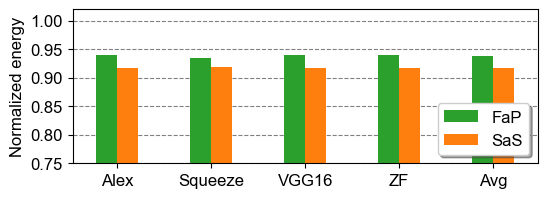

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile


plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['axes.titlesize'] = 12  # Tamaño del título de los ejes
plt.rcParams['axes.labelsize'] = 12 # Tamaño de las etiquetas de los ejes
plt.rcParams['legend.fontsize'] = 12  # Tamaño de la fuente de las leyendas
plt.rcParams['xtick.labelsize'] = 12  # Tamaño de las etiquetas del eje x
plt.rcParams['ytick.labelsize'] = 12  # Tamaño de las etiquetas del eje y

n = len(Energia_Mors_0_53.index)
x = np.arange(n)
coloresRedes = ['#2CA02C', '#FF7F0E' ]
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(15,5), dpi=100)

bars=Energia_Mors_0_53.plot(kind ='bar' ,stacked = False,width = 0.45, color = coloresRedes,figsize=(6,2.0), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized energy')
plt.xticks(x, Energia_Mors_0_53.index )

#lg = plt.legend(  loc ="center", bbox_to_anchor=(0.5,1.1),shadow = True)
lg.draw_frame(False)
plt.legend((['FaP','SaS']),  loc ="lower right", shadow = True)
plt.ylim(0.75,1.02)
#bars.set_ylim(bottom=0, top=3)
plt.yticks(np.arange(0.75, 1.02, step=0.05))
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])

plt.grid(axis='y', color = 'gray', linestyle = 'dashed')



plt.savefig('energia_Mors_shorter_sas_53.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

# Time

In [191]:
import pandas as pd
time_Mors_52=pd.read_excel('MoRS/Analisis_Resultados/Energía_VBW/final_prestaciones_energia_SaS.xlsx',
                        sheet_name='time_ex_iccd_short', usecols=["Redes","FaP" ,"SaS-0.52"])
time_Mors_52= time_Mors_52.set_index("Redes")

time_Mors_53=pd.read_excel('MoRS/Analisis_Resultados/Energía_VBW/final_prestaciones_energia_SaS.xlsx',
                        sheet_name='time_ex_iccd_short', usecols=["Redes","FaP" ,"SaS-0.53"])
time_Mors_53= time_Mors_53.set_index("Redes")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
#acc_by_tech
#df = pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja2')

# Extraer los datos de la columna 'Columna1'
#Tecnic = df['Tecnic']
#Redes  = df['Redes']
#columnas_seleccionadas = df.iloc[ [2, 3, 4]]  
#ACC=df["0.53 V","0.52 V","0.51 V"]
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])
time_Mors_52

,FaP,SaS-0.52
Redes,,
Alex,1.000004,1.004950
Squeeze,1.000026,1.024313
VGG16,1.000012,1.001544
ZF,1.000006,1.003489
Avg,1.000012,1.008574


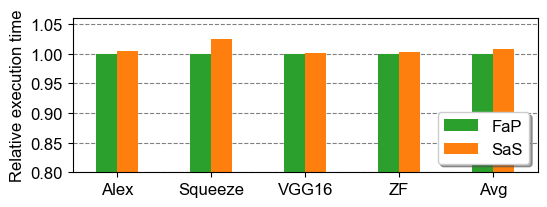

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile


plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['axes.titlesize'] = 12  # Tamaño del título de los ejes
plt.rcParams['axes.labelsize'] = 12 # Tamaño de las etiquetas de los ejes
plt.rcParams['legend.fontsize'] = 12  # Tamaño de la fuente de las leyendas
plt.rcParams['xtick.labelsize'] = 12  # Tamaño de las etiquetas del eje x
plt.rcParams['ytick.labelsize'] = 12  # Tamaño de las etiquetas del eje y

n = len(time_Mors_52.index)
x = np.arange(n)
coloresRedes = ['#2CA02C', '#FF7F0E' ]
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(15,5), dpi=100)

bars=time_Mors_52.plot(kind ='bar' ,stacked = False,width = 0.45, color = coloresRedes,figsize=(6,2), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Relative execution time')
plt.xticks(x, time_Mors_52.index )

plt.legend((['FaP','SaS']),  loc ="lower right", shadow = True)
lg.draw_frame(False)
#plt.legend(  loc ="center right",bbox_to_anchor=(0.,0.45), shadow = True)
plt.ylim(0.8,1.06)
#bars.set_ylim(bottom=0, top=3)
plt.yticks(np.arange(0.8, 1.06, step=0.05))
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])

plt.grid(axis='y', color = 'gray', linestyle = 'dashed')


plt.savefig('performance_Shorter_52.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)



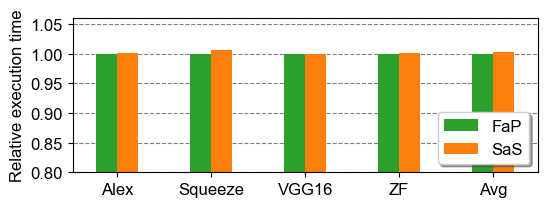

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile


plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['axes.titlesize'] = 12  # Tamaño del título de los ejes
plt.rcParams['axes.labelsize'] = 12 # Tamaño de las etiquetas de los ejes
plt.rcParams['legend.fontsize'] = 12  # Tamaño de la fuente de las leyendas
plt.rcParams['xtick.labelsize'] = 12  # Tamaño de las etiquetas del eje x
plt.rcParams['ytick.labelsize'] = 12  # Tamaño de las etiquetas del eje y

n = len(time_Mors_53.index)
x = np.arange(n)
coloresRedes = ['#2CA02C', '#FF7F0E' ]
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(15,5), dpi=100)

bars=time_Mors_53.plot(kind ='bar' ,stacked = False,width = 0.45, color = coloresRedes,figsize=(6,2), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Relative execution time')
plt.xticks(x, time_Mors_53.index )

plt.legend((['FaP','SaS']),  loc ="lower right", shadow = True)
lg.draw_frame(False)
#plt.legend(  loc ="center right",bbox_to_anchor=(0.,0.45), shadow = True)
plt.ylim(0.8,1.06)
#bars.set_ylim(bottom=0, top=3)
plt.yticks(np.arange(0.8, 1.06, step=0.05))
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])

plt.grid(axis='y', color = 'gray', linestyle = 'dashed')


plt.savefig('performance_Shorter_53.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)



In [198]:
import pandas as pd
acc_low_and_high_52=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/iccd_shorter.xlsx',sheet_name='iccd_LH_L_f_h', 
                                  usecols=["Tecnic" ,"0.52 V"])
acc_low_and_high_52= acc_low_and_high_52.set_index("Tecnic")
acc_low_and_high_53=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/iccd_shorter.xlsx',sheet_name='iccd_LH_L_f_h', 
                                  usecols=["Tecnic" ,"0.53 V"])
acc_low_and_high_53= acc_low_and_high_53.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])

#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])
acc_low_and_high_53

,0.53 V
Tecnic,
L&H,1.000898
L+f(H),1.000599
L&H,0.164900
L+f(H),0.480516
L&H,0.273510
L+f(H),0.781291
L&H,0.629120
L+f(H),1.002720
L&H,0.517107


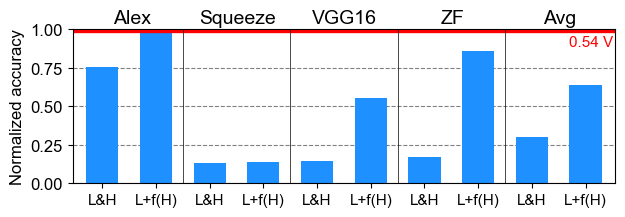

In [199]:
plt.rcParams['font.size'] = 14  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
n = len(acc_low_and_high_52.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)

coloresRedes = ['dodgerblue']
#coloresRedes = ['#d62728', '#2ca02c', '#9467bd']
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

acc=acc_low_and_high_52.plot(kind ='bar' ,stacked = False,width = 0.60, color = coloresRedes,
                          figsize=(7,2),  zorder=2)

#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized accuracy', )
plt.xticks(x, acc_low_and_high_52.index, )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1)
#bars.set_ylim(bottom=0, top=3)

plt.xticks(rotation = 0,fontsize=11)
plt.yticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')



plt.legend().remove()
#["0.58","0.56","0.54"]


plt.text(0.2, 1.04, 'Alex')
plt.text(1.8, 1.04, 'Squeeze')
plt.text(3.9, 1.04, 'VGG16' )
plt.text(6.3,1.04, 'ZF')
plt.text(8.2, 1.04, 'Avg')


#plt.axhline(y=50, color='r', linestyle='--')
#plt.axhline(y=1, color='red', linestyle='-', label='0.54 V')

plt.text(8.7, 0.89, '0.54 V',fontsize=11, color="red")
plt.axhline(y=1, color="red",linestyle='-',linewidth=6,label='0.54 V')#Alex
#legend2 = plt.legend(['0.54 V'], loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.89))
#custom_legend = [Line2D([0], [0], color='red', lw=1.7, label='0.54 V')]
#plt.legend(handles=custom_legend, loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.875),shadow = True)
#plt.gca().add_artist(legend1)
plt.axvline(x=1.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=3.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=7.5, ymax= 5, color="black",linewidth=0.5)#mobil

plt.savefig('acc_high_order_scratch_stacked_shorter_52.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

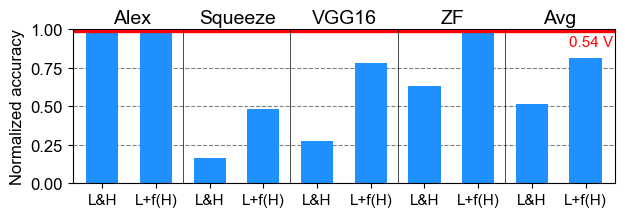

In [197]:
plt.rcParams['font.size'] = 14  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif



import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
n = len(acc_low_and_high_53.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
#coloresRedes = ['#ff7f0e', 'green','dodgerblue']
#coloresRedes = ['#ffbb78', '#1f77b4','#7f7f7f']
coloresRedes = ['dodgerblue', '#2ca02c', '#ff7f0e']
#coloresRedes = ['#d62728', '#2ca02c', '#9467bd']
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

acc=acc_low_and_high_53.plot(kind ='bar' ,stacked = False,width = 0.60, color = coloresRedes,
                          figsize=(7,2),  zorder=2)

#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized accuracy', )
plt.xticks(x, acc_low_and_high_53.index, )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1)
#bars.set_ylim(bottom=0, top=3)

plt.xticks(rotation = 0,fontsize=11)
plt.yticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')



plt.legend().remove()
#["0.58","0.56","0.54"]


plt.text(0.2, 1.04, 'Alex')
plt.text(1.8, 1.04, 'Squeeze')
plt.text(3.9, 1.04, 'VGG16' )
plt.text(6.3,1.04, 'ZF')
plt.text(8.2, 1.04, 'Avg')


#plt.axhline(y=50, color='r', linestyle='--')
#plt.axhline(y=1, color='red', linestyle='-', label='0.54 V')

plt.text(8.7, 0.89, '0.54 V',fontsize=11, color="red")
plt.axhline(y=1, color="red",linestyle='-',linewidth=6,label='0.54 V')#Alex
#legend2 = plt.legend(['0.54 V'], loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.89))
#custom_legend = [Line2D([0], [0], color='red', lw=1.7, label='0.54 V')]
#plt.legend(handles=custom_legend, loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.875),shadow = True)
#plt.gca().add_artist(legend1)
plt.axvline(x=1.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=3.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=7.5, ymax= 5, color="black",linewidth=0.5)#mobil

plt.savefig('acc_high_order_scratch_stacked_shorter_53.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)